# Preprocessing the data 
In MNIST our data was already preprocessed and stored in convinient form for our learning process, now we are dealing with many different size of images and many different qualities. Some of them probably don't even have an animal in it. So obvious move is to standarize all data to fit input layer and maybe delete some wrong images

### Imports :)

In [1]:
import os 
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Your path to unpacked files from kaggel
# Eventaully I want to use some more images that I've downloaded urls for from image-net.org
TRAIN_DATA = os.getcwd() + '/cats_vs_dogs/train'

### Exploring our images
Lets prepare df that will store images name, path, label, size, aspect ratio and probably more :)

In [3]:
df = pd.DataFrame(index=os.listdir(TRAIN_DATA))
df['path'] = df.index.map(lambda x: os.path.join(TRAIN_DATA, x))
df['label'] = df.index.map(lambda x: x.split('.')[0])
df['size'] = df['path'].map(lambda x: Image.open(x).size)
df['width'] = df['size'].map(lambda x: x[0])
df['height'] = df['size'].map(lambda x: x[1])
df['aspect ratio'] = df['width'] / df['height'] 

In [4]:
print(df['label'].value_counts().to_string())

dog    12500
cat    12500


We can see that thata is nicely spread 

In [5]:
dogs = df[df['label'] == 'dog']['path']
cats = df[df['label'] == 'cat']['path']

In [67]:
# Function to show images using Matplotlib :)
# Takes iterable of 4 paths 
def show_images(paths):
    fig = plt.figure()
    for n, path in enumerate(paths, 1):
        #I create 2x2 space for images so its best to pass 4
        y = fig.add_subplot(2, 2, n)
        img = Image.open(path)
        if 'cat' in path.split('/')[-1]: label = 'Cat'
        elif 'dog' in path.split('/')[-1]: label = 'Dog'
        y.imshow(img ,cmap='gray')
        plt.title(label)
        y.axes.get_xaxis().set_visible(False)
        y.axes.get_yaxis().set_visible(False)

### Some random dogs and cats


Some random dogs


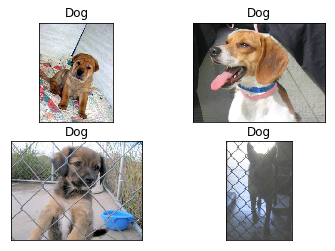

In [24]:
print('Some random dogs')
show_images(dogs.sample(4))

Some random cats


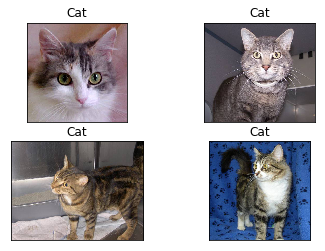

In [25]:
print('Some random cats')
show_images(cats.sample(4))

### Basic statistics for our data

In [47]:
sizes = df['size'].value_counts()
print(f'Most common sizes:\n{sizes.head().to_string()} \n')
print(f'Least frequent size values:\n{sizes.tail().to_string()} \n')
print(f'Image width & height distribution:\n{df[["width", "height"]].describe().astype(int).T}')

Most common sizes:
(500, 374)    2955
(499, 375)    2912
(375, 499)     261
(499, 333)     229
(374, 500)     227 

Least frequent size values:
(300, 162)    1
(375, 400)    1
(159, 233)    1
(240, 189)    1
(394, 360)    1 

Image width & height distribution:
        count  mean  std  min  25%  50%  75%   max
width   25000   404  109   42  323  447  499  1050
height  25000   360   97   32  301  374  421   768


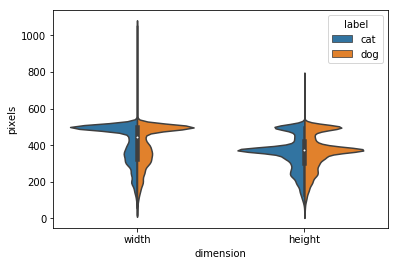

In [54]:
sns.violinplot(x='dimension', 
               y='pixels', 
               hue='label', 
               data=pd.melt(df, id_vars='label', value_vars=['width', 'height'], value_name='pixels', var_name='dimension'), 
               split=True);

Violin plots ensure us that:
- the distribution of height is bimodal
- there is virtually no difference in distribition of size for dogs/cats

### Extreme cases

Lowest heights


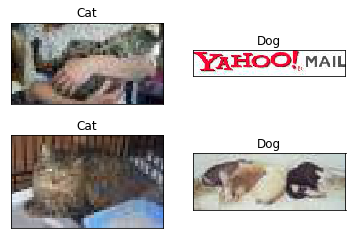

In [56]:
print('Lowest heights')
show_images(df.sort_values(by='height')['path'].head(4))

Lowest widths


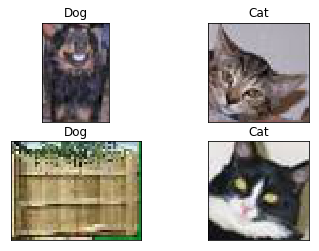

In [59]:
print('Lowest widths')
show_images(df.sort_values(by='width')['path'].head(4))

Now we can also see that some of the images are breaking our model because they don't contain any of our objects

Highest aspect ratio


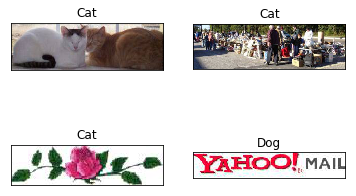

In [69]:
print('Highest aspect ratio')
show_images(df.sort_values(by='aspect ratio')['path'].tail(4))

Lowest aspect ratio


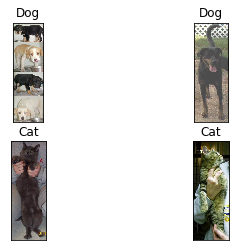

In [71]:
print('Lowest aspect ratio')
show_images(df.sort_values(by='aspect ratio')['path'].head(4))